In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

In [29]:
sns.set(style="whitegrid")

In [30]:
diamonds_data = pd.read_csv('Diamonds Prices2022.csv')

In [33]:
diamonds_data.describe()

Unnamed: 0         carat         depth         table         price  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean   26972.000000      0.797935     61.749322     57.457251   3932.734294   
std    15572.147122      0.473999      1.432626      2.234549   3989.338447   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13486.500000      0.400000     61.000000     56.000000    950.000000   
50%    26972.000000      0.700000     61.800000     57.000000   2401.000000   
75%    40457.500000      1.040000     62.500000     59.000000   5324.000000   
max    53943.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53943.000000  53943.000000  53943.000000  
mean       5.731158      5.734526      3.538730  
std        1.121730      1.142103      0.705679  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [34]:
diamonds_data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [35]:
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [36]:
diamonds_data = diamonds_data.drop_duplicates()

In [37]:
diamonds_data = diamonds_data.drop(columns=['Unnamed: 0'])

In [38]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']


In [39]:
encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])
diamonds_data[['cut', 'color', 'clarity']] = encoder.fit_transform(diamonds_data[['cut', 'color', 'clarity']])

In [40]:
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Q1 = diamonds_data[numerical_columns].quantile(0.25)
Q3 = diamonds_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
diamonds_data = diamonds_data[~((diamonds_data[numerical_columns] < (Q1 - 1.5 * IQR)) | (diamonds_data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [41]:
diamonds_data.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23  4.0    5.0      1.0   61.5   55.0    326  3.95  3.98  2.43
1   0.21  3.0    5.0      2.0   59.8   61.0    326  3.89  3.84  2.31
3   0.29  3.0    1.0      3.0   62.4   58.0    334  4.20  4.23  2.63
4   0.31  1.0    0.0      1.0   63.3   58.0    335  4.34  4.35  2.75
5   0.24  2.0    0.0      5.0   62.8   57.0    336  3.94  3.96  2.48

In [17]:
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
z_scores = np.abs(stats.zscore(diamonds_data.select_dtypes(include=[np.number])))
diamonds_data = diamonds_data[(z_scores < 3).all(axis=1)]


In [43]:
diamonds_data.shape

(47109, 10)

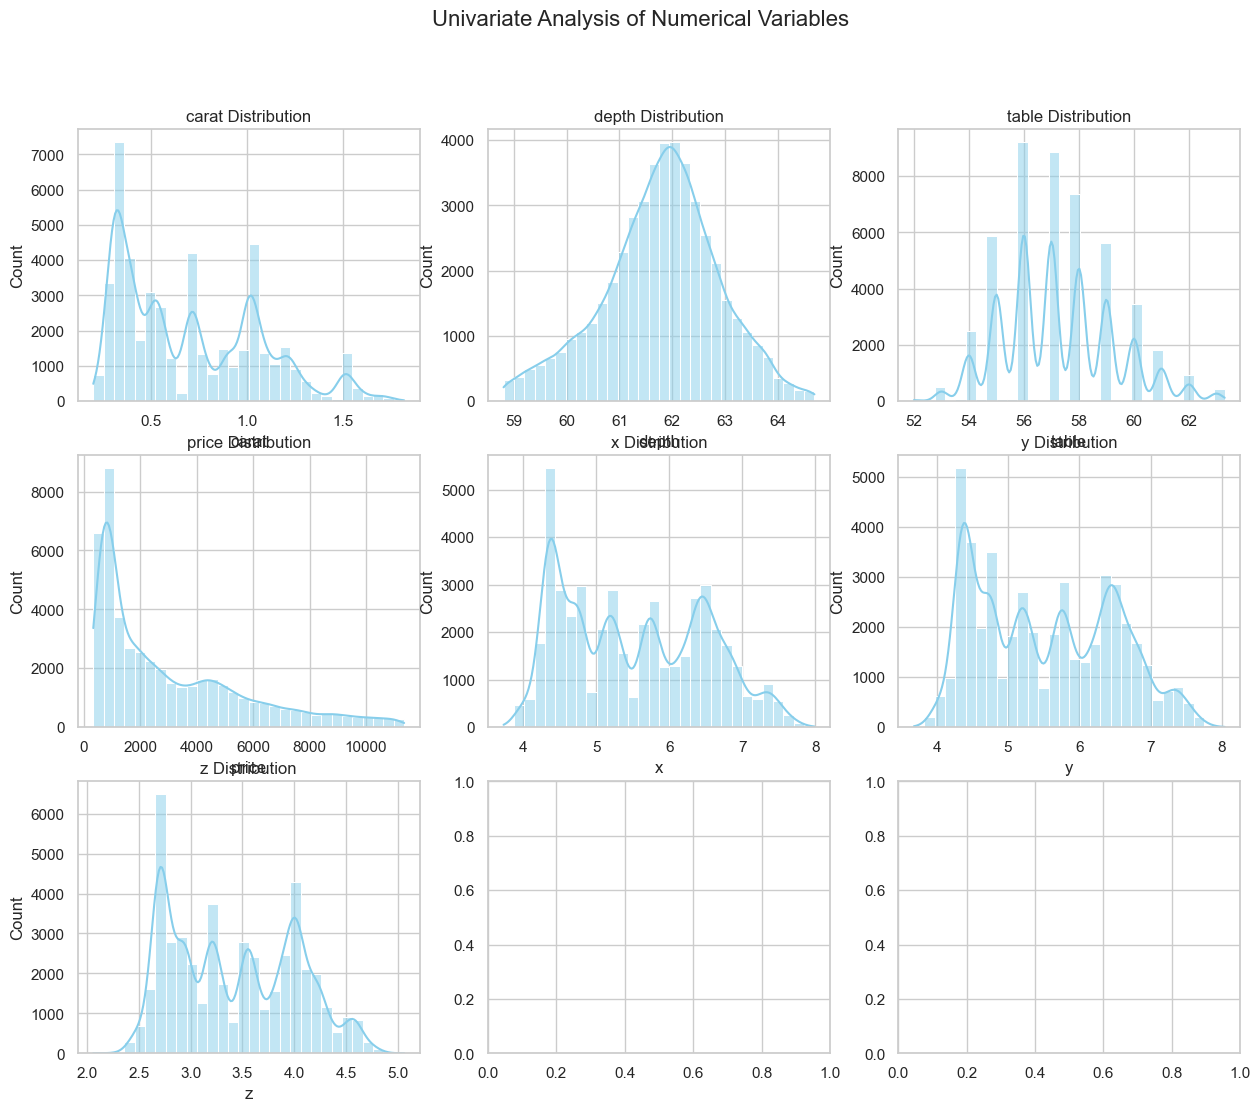

In [44]:
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Univariate Analysis of Numerical Variables', fontsize=16)
for i, col in enumerate(numerical_columns):
    sns.histplot(diamonds_data[col], kde=True, ax=axes[i//3, i%3], bins=30, color="skyblue")
    axes[i//3, i%3].set_title(f'{col} Distribution')

In [45]:
for j in range(i + 1, 9):
    fig.delaxes(axes[j//3, j%3])

In [46]:
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>

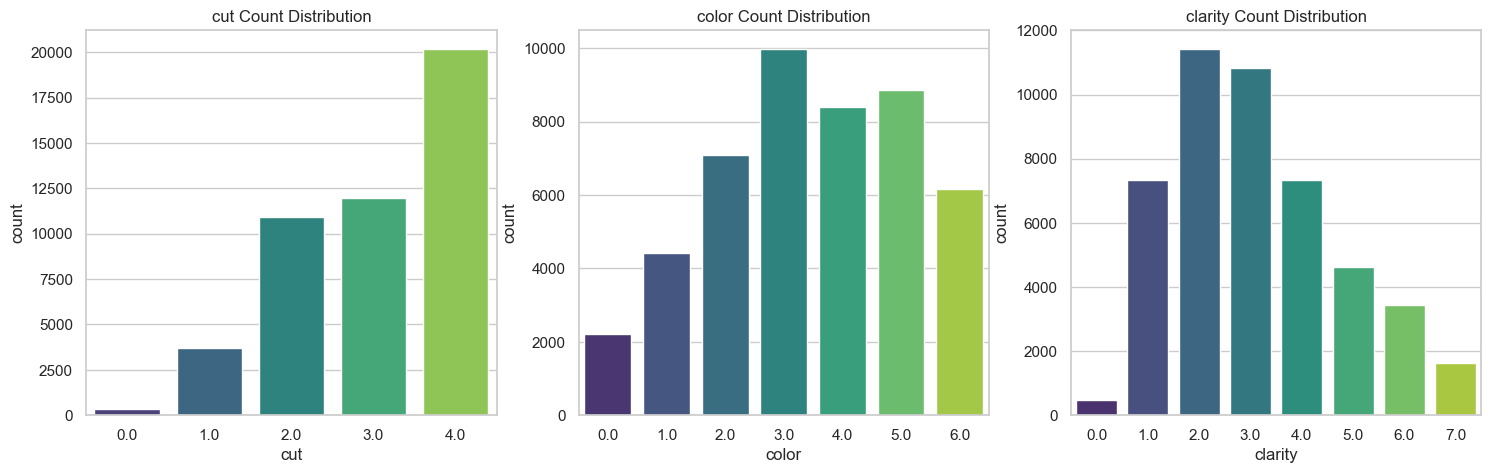

In [47]:
categorical_columns = ['cut', 'color', 'clarity']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(data=diamonds_data, x=col, palette="viridis", ax=axes[i])
    axes[i].set_title(f'{col} Count Distribution')
    

In [48]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

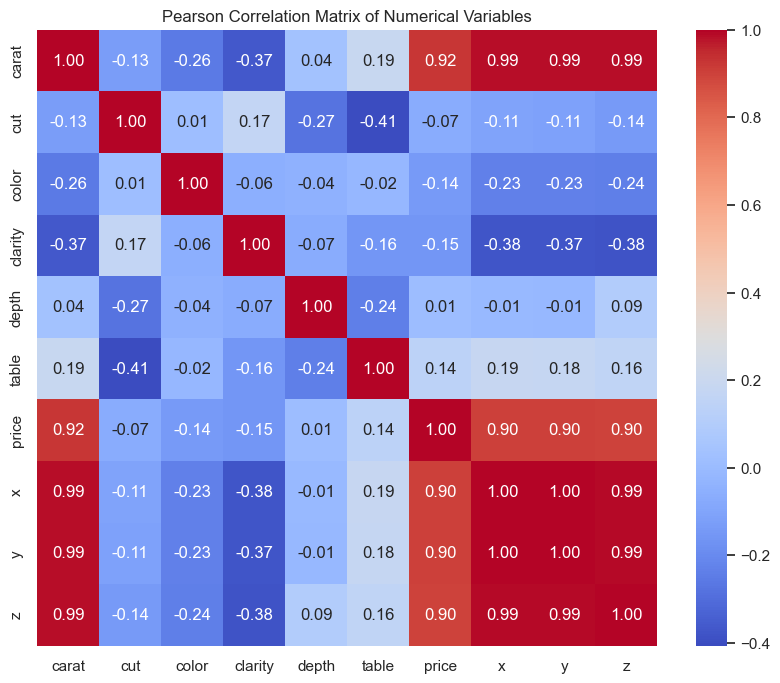

In [49]:
plt.figure(figsize=(10, 8))
pearson_corr = diamonds_data.corr()
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Matrix of Numerical Variables")
plt.show()


/Users/riya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


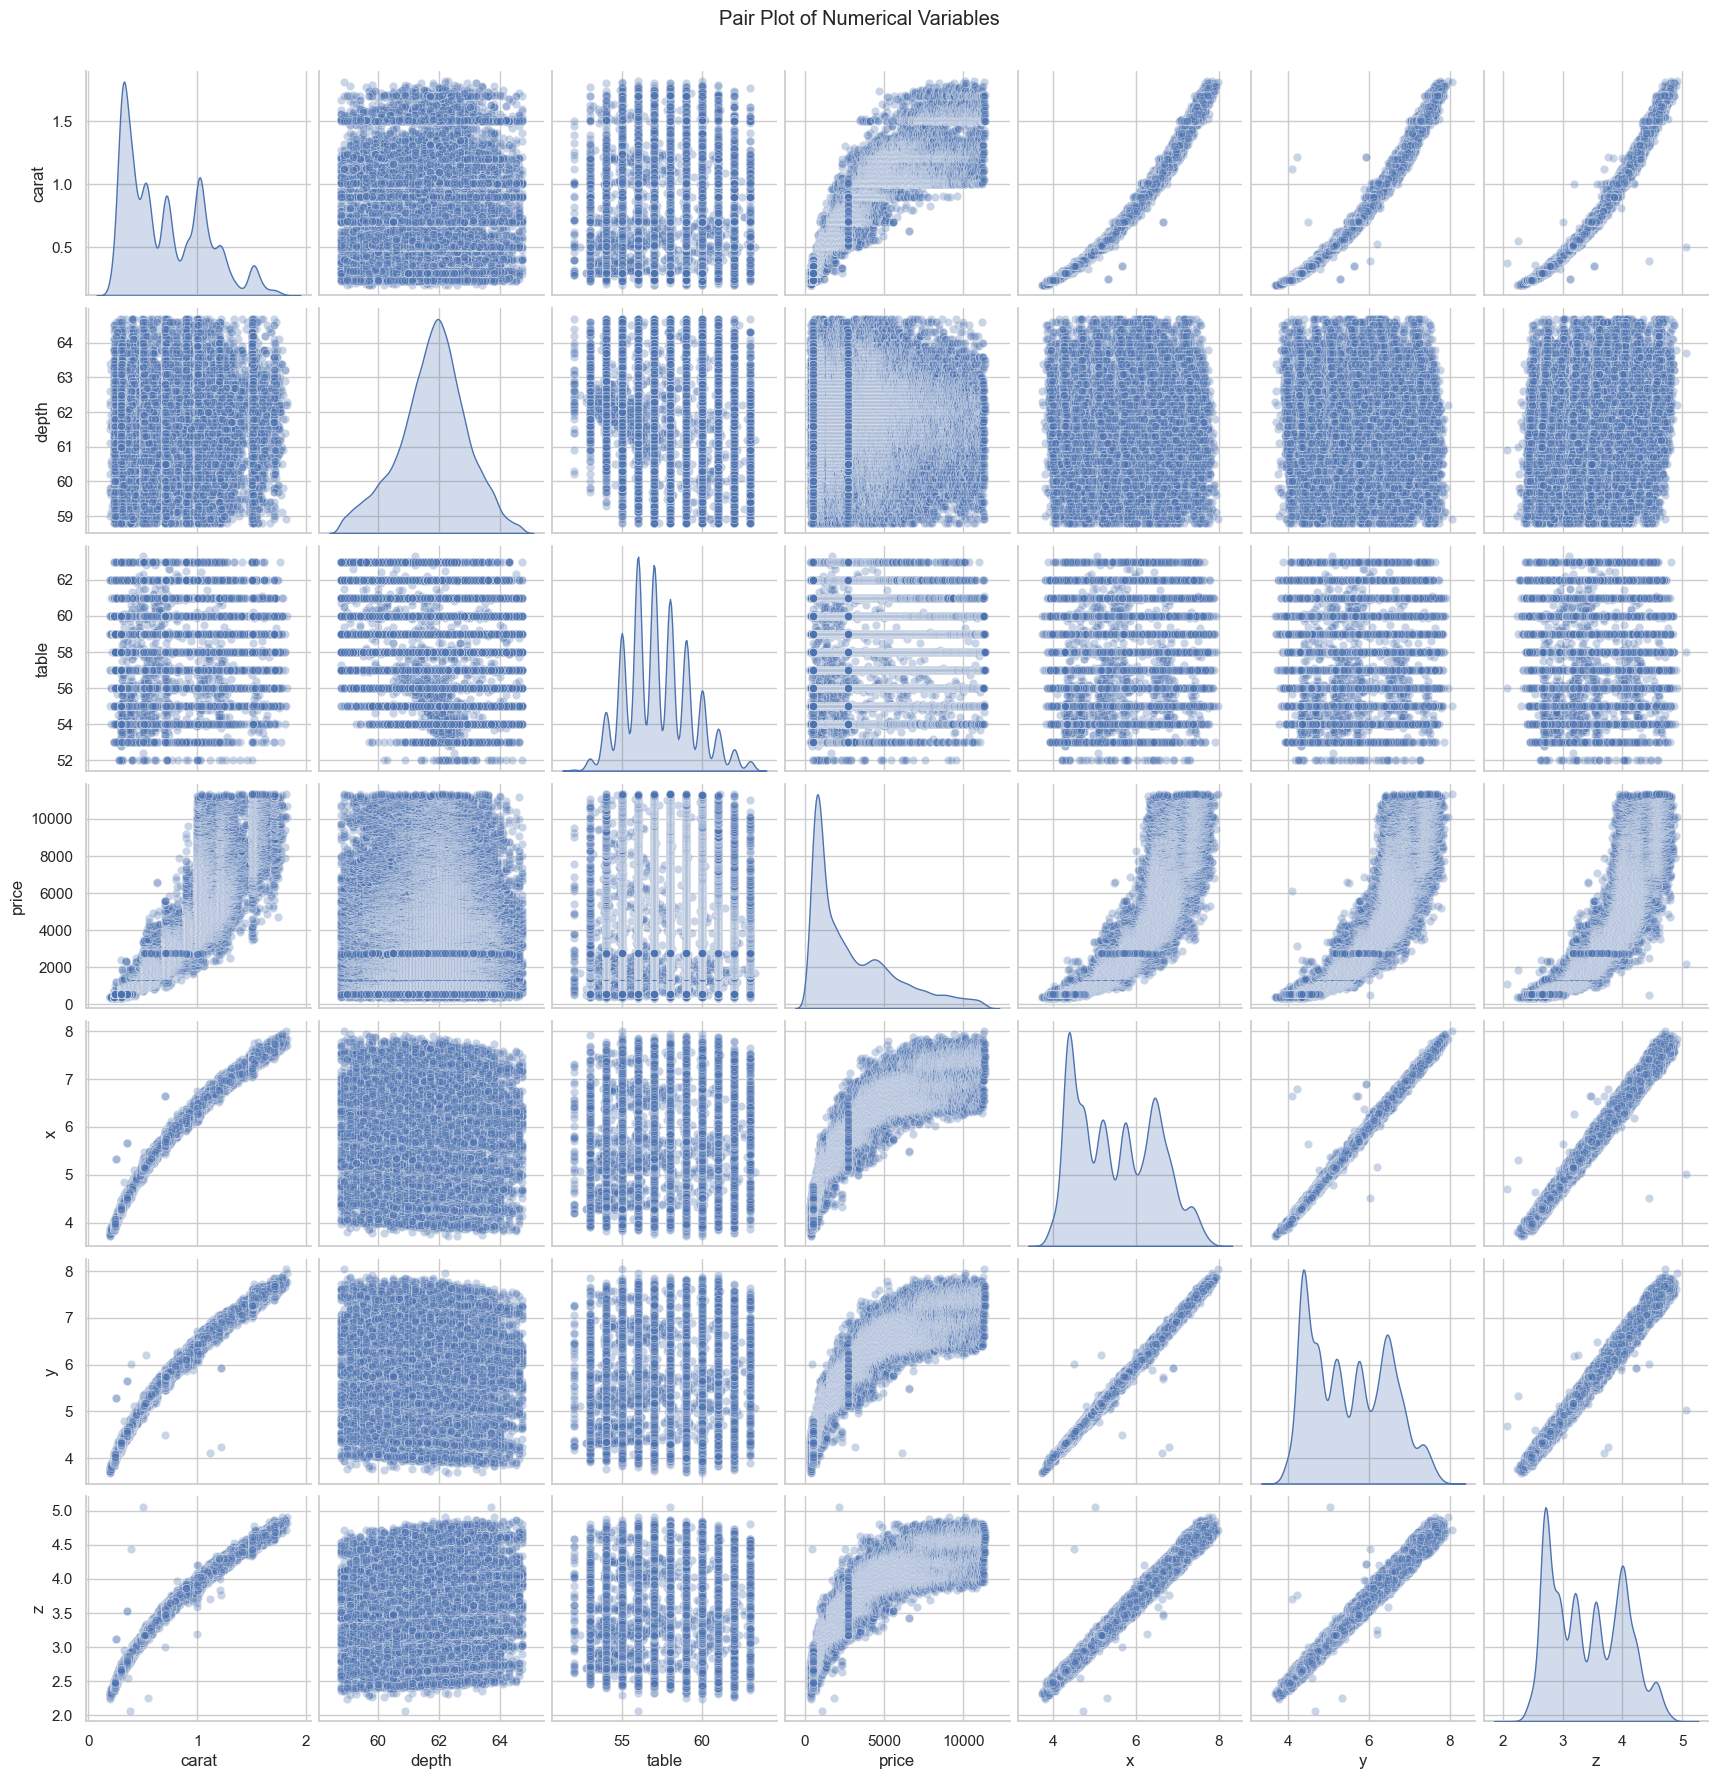

In [50]:
sns.pairplot(diamonds_data[numerical_columns], diag_kind='kde', plot_kws={'alpha':0.3})
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

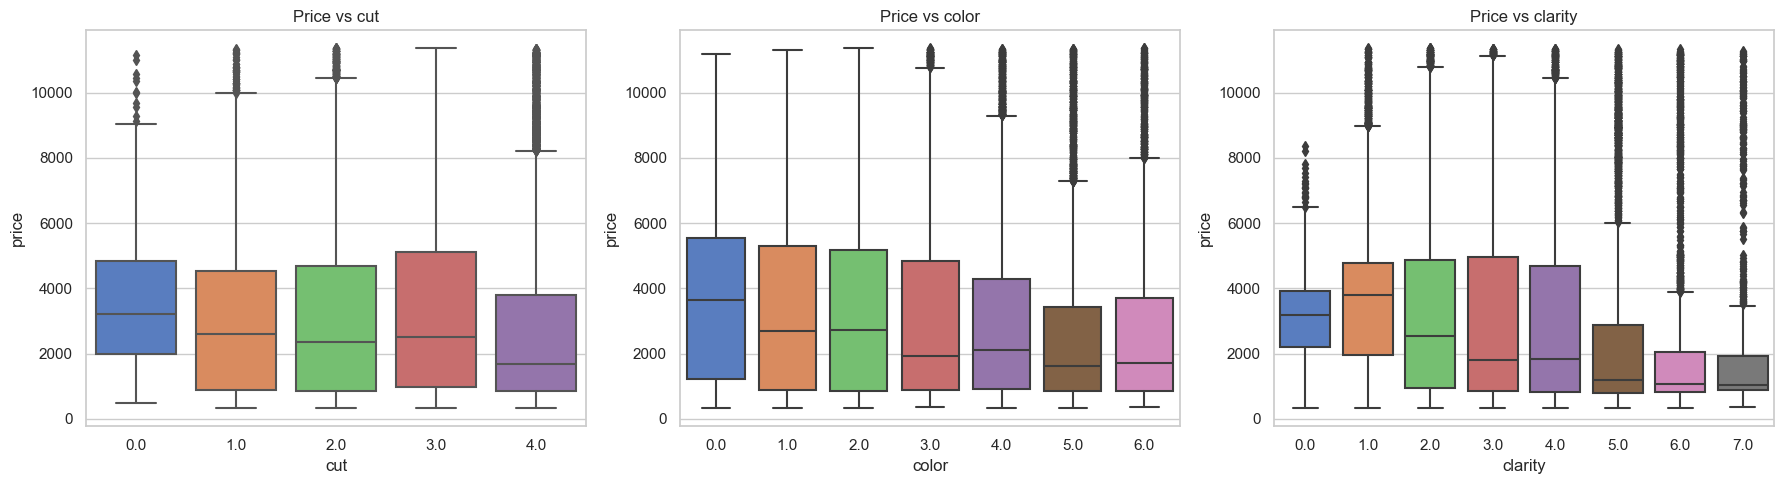

In [51]:

# Box plots to explore relationships between price and categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_columns):
    sns.boxplot(data=diamonds_data, x=col, y='price', palette="muted", ax=axes[i])
    axes[i].set_title(f'Price vs {col}')

plt.tight_layout()
plt.show()


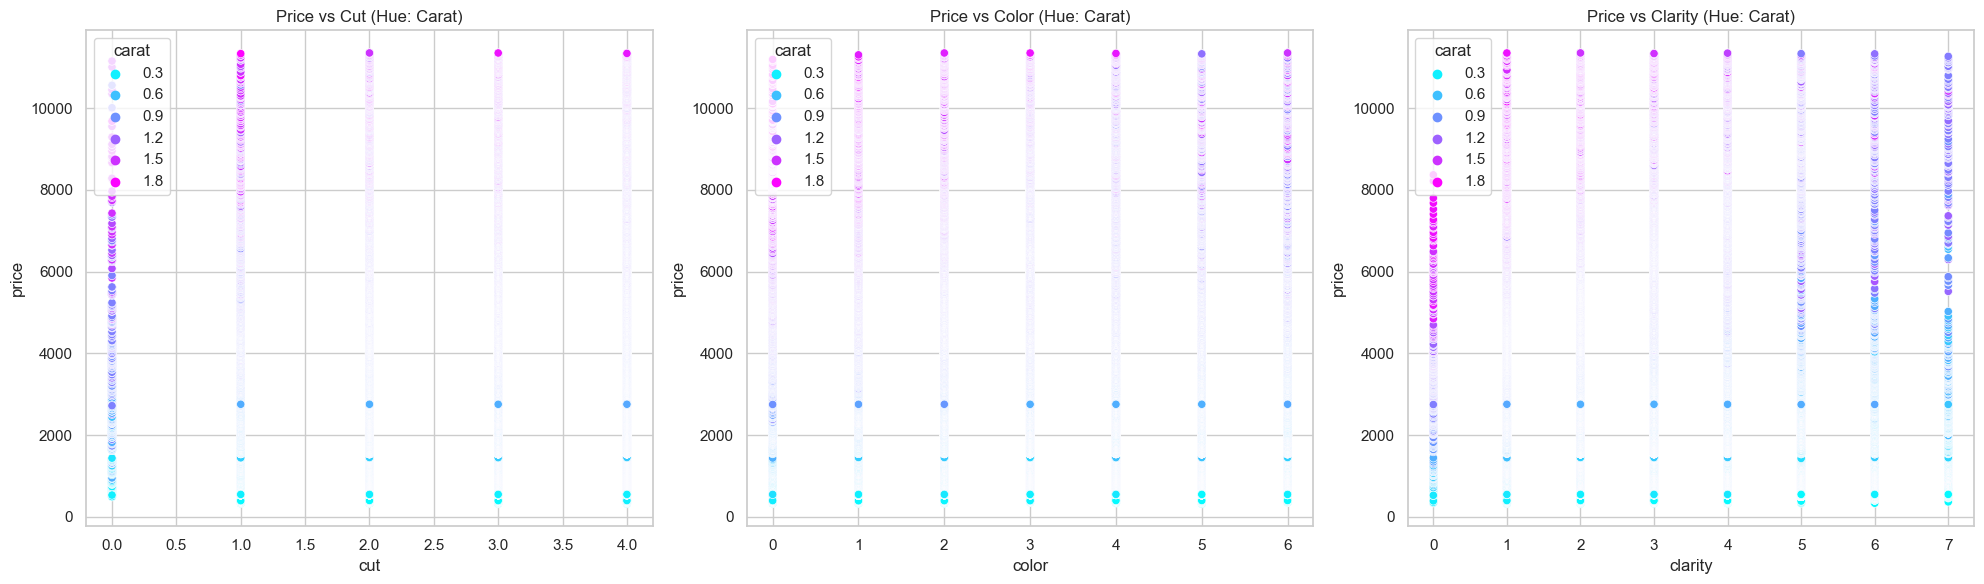

In [52]:
# Analyzing the effect of 'cut', 'color', and 'clarity' on price with carat size as a hue in scatter plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.scatterplot(data=diamonds_data, x='cut', y='price', hue='carat', palette='cool', ax=axes[0])
axes[0].set_title("Price vs Cut (Hue: Carat)")
sns.scatterplot(data=diamonds_data, x='color', y='price', hue='carat', palette='cool', ax=axes[1])
axes[1].set_title("Price vs Color (Hue: Carat)")
sns.scatterplot(data=diamonds_data, x='clarity', y='price', hue='carat', palette='cool', ax=axes[2])
axes[2].set_title("Price vs Clarity (Hue: Carat)")
plt.tight_layout()
plt.show()

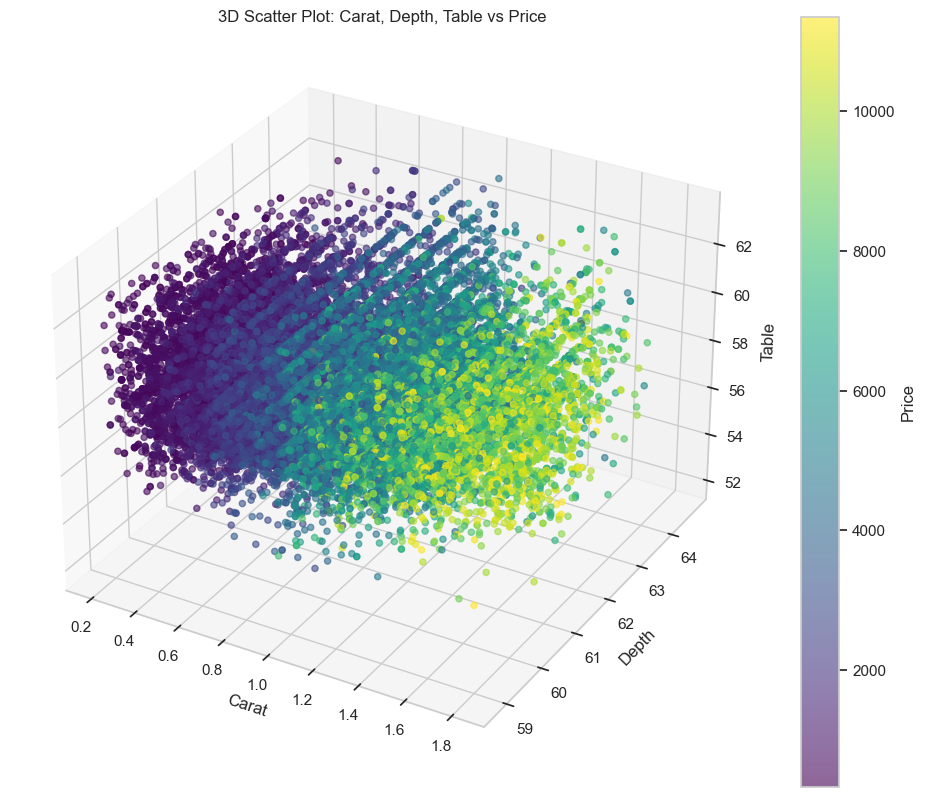

In [53]:
from mpl_toolkits.mplot3d import Axes3D##Checking relationships between carat, depth, table, and price through 3D scatter plots
# Import 3D plotting library

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(diamonds_data['carat'], diamonds_data['depth'], diamonds_data['table'],
                c=diamonds_data['price'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Price')
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Table')
plt.title('3D Scatter Plot: Carat, Depth, Table vs Price')
plt.show()
